In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
# import ensemble methods
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
# import base estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [111]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("../../04_datasets/nfl_dataset_vf.csv", index_col=0)
print("...Done.")
print()

Loading dataset...
...Done.



In [112]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 1289

Display of dataset: 


,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
0,2017,13,Vikings,Falcons,400951677,0,Dan Quinn,Mike Zimmer,NaN,NaN,...,10.4,9.4,10.0,7.0,Mercedes-Benz Stadium,"Atlanta, GA",95.0,12,3,6
1,2017,9,Falcons,Panthers,400951749,1,Ron Rivera,Dan Quinn,cloudy,61.0,...,22.4,7.4,7.0,7.0,Bank of America Stadium,"Charlotte, NC",100.0,11,5,6
2,2017,9,Bengals,Jaguars,400951753,1,Doug Marrone,Marvin Lewis,NaN,78.0,...,0.4,8.4,7.0,14.0,TIAA Bank Field,"Jacksonville, FL",89.0,11,5,6
3,2017,4,Bears,Packers,400951678,1,Mike McCarthy,John Fox,cloudy,65.0,...,NaN,NaN,4.0,4.0,Lambeau Field,"Green Bay, WI",97.0,9,29,4
4,2017,9,Colts,Texans,400951751,0,Bill O'Brien,Chuck Pagano,cloudy,84.0,...,31.4,9.0,7.0,6.0,NRG Stadium,"Houston, TX",100.0,11,5,6



Basics statistics: 


,season,week,awayteam,hometeam,idgame,winner_home,home_coach,away_coach,weather_type,temperature,...,punt_return_yds_MA_5_home,kicking_pts_MA_5_home,delta_day_away,delta_day_home,stade,location,people,month,dayofmonth,dayofweek
count,1289.000000,1289.000000,1289,1289,1.289000e+03,1289.000000,1289,1289,1043,1179.000000,...,1175.000000,1175.000000,1245.000000,1239.000000,1289,1289,1140.000000,1289.000000,1289.000000,1289.000000
unique,NaN,NaN,32,32,NaN,NaN,63,63,7,NaN,...,NaN,NaN,NaN,NaN,37,35,NaN,NaN,NaN,NaN
top,NaN,NaN,Seahawks,Titans,NaN,NaN,Sean McDermott,Kyle Shanahan,cloudy,NaN,...,NaN,NaN,NaN,NaN,MetLife Stadium,"East Rutherford, NJ",NaN,NaN,NaN,NaN
freq,NaN,NaN,41,41,NaN,NaN,41,41,522,NaN,...,NaN,NaN,NaN,NaN,81,81,NaN,NaN,NaN,NaN
mean,2019.027153,9.175330,NaN,NaN,4.011341e+08,0.539178,NaN,NaN,NaN,56.229008,...,14.448170,6.968000,19.679518,19.593220,NaN,NaN,88.013158,10.254461,16.082234,5.098526
std,1.422984,5.062066,NaN,NaN,1.338832e+05,0.498656,NaN,NaN,NaN,22.435574,...,8.710801,1.811904,53.993547,54.142582,NaN,NaN,24.114280,2.123613,8.765195,1.920486
min,2017.000000,1.000000,NaN,NaN,4.009502e+08,0.000000,NaN,NaN,NaN,1.000000,...,-1.800000,1.600000,3.000000,3.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000
25%,2018.000000,5.000000,NaN,NaN,4.010308e+08,0.000000,NaN,NaN,NaN,44.000000,...,8.200000,5.800000,6.000000,6.000000,NaN,NaN,91.000000,10.000000,9.000000,6.000000
50%,2019.000000,9.000000,NaN,NaN,4.011280e+08,1.000000,NaN,NaN,NaN,61.000000,...,12.600000,7.000000,7.000000,7.000000,NaN,NaN,97.000000,11.000000,16.000000,6.000000
75%,2020.000000,14.000000,NaN,NaN,4.012203e+08,1.000000,NaN,NaN,NaN,73.000000,...,18.800000,8.200000,7.000000,7.000000,NaN,NaN,100.000000,12.000000,24.000000,6.000000



Percentage of missing values: 


season                         0.000000
week                           0.000000
awayteam                       0.000000
hometeam                       0.000000
idgame                         0.000000
winner_home                    0.000000
home_coach                     0.000000
away_coach                     0.000000
weather_type                  19.084562
temperature                    8.533747
humidity                       7.447634
wind                          13.343677
streak_away                    2.249806
pass_yds_MA_5_away             8.456168
pass_td_MA_5_away              8.456168
rush_yds_MA_5_away             8.456168
rush_td_MA_5_away              8.456168
rec_yds_MA_5_away              8.456168
rec_td_MA_5_away               8.456168
fumbles_MA_5_away              8.456168
fumbles_rec_MA_5_away          8.456168
defense_sacks_MA_5_away        8.456168
defense_td_MA_5_away           8.456168
interceptions_MA_5_away        8.456168
interceptions_td_MA_5_away     8.456168


In [113]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "winner_home"

X = dataset.drop(target_variable, axis = 1)
features_drop_list = {'idgame', 'home_coach', 'away_coach', 'location', 'season'}
X.drop(features_drop_list, axis=1, inplace=True)

Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    1
2    1
3    1
4    0
Name: winner_home, dtype: int64

X :
   week awayteam  hometeam weather_type  temperature  humidity  wind  \
0    13  Vikings   Falcons          NaN          NaN       NaN   NaN   
1     9  Falcons  Panthers       cloudy         61.0      86.0   4.0   
2     9  Bengals   Jaguars          NaN         78.0      74.0  12.0   
3     4    Bears   Packers       cloudy         65.0      62.0   5.0   
4     9    Colts    Texans       cloudy         84.0      62.0  10.0   

   streak_away  pass_yds_MA_5_away  pass_td_MA_5_away  ...  \
0          7.0               268.4                1.8  ...   
1          1.0               254.2                1.4  ...   
2          1.0               241.8                2.2  ...   
3          1.0                 NaN                NaN  ...   
4         -3.0               223.2                0.8  ...   

   kicks_return_td_MA_5_home  punt_return_yds_MA_5_home  \
0            

In [114]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['week', 'temperature', 'humidity', 'wind', 'streak_away', 'pass_yds_MA_5_away', 'pass_td_MA_5_away', 'rush_yds_MA_5_away', 'rush_td_MA_5_away', 'rec_yds_MA_5_away', 'rec_td_MA_5_away', 'fumbles_MA_5_away', 'fumbles_rec_MA_5_away', 'defense_sacks_MA_5_away', 'defense_td_MA_5_away', 'interceptions_MA_5_away', 'interceptions_td_MA_5_away', 'kicks_return_yds_MA_5_away', 'kicks_return_td_MA_5_away', 'punt_return_yds_MA_5_away', 'kicking_pts_MA_5_away', 'streak_home', 'pass_yds_MA_5_home', 'pass_td_MA_5_home', 'rush_yds_MA_5_home', 'rush_td_MA_5_home', 'rec_yds_MA_5_home', 'rec_td_MA_5_home', 'fumbles_MA_5_home', 'fumbles_rec_MA_5_home', 'defense_sacks_MA_5_home', 'defense_td_MA_5_home', 'interceptions_MA_5_home', 'interceptions_td_MA_5_home', 'kicks_return_yds_MA_5_home', 'kicks_return_td_MA_5_home', 'punt_return_yds_MA_5_home', 'kicking_pts_MA_5_home', 'delta_day_away', 'delta_day_home', 'people', 'month', 'dayofmonth', 'dayofweek']
Found categorical features  ['aw

In [115]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [116]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [117]:
# Create pipeline for categorical features
#categorical_transformer = OneHotEncoder(drop='first') # no missing values in categorical data, so we only need the OHE

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ]) 

In [118]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [119]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done preprocessing train set.')
print(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
      week    awayteam  hometeam weather_type  temperature  humidity  wind  \
642     13    Patriots    Texans          NaN          6.0      32.0   4.0   
1008     3  Buccaneers   Broncos       cloudy         55.0      39.0   7.0   
280     10     Falcons    Browns        sunny         36.0      56.0   9.0   
1200    13      Giants  Dolphins        sunny         82.0      54.0   9.0   
1183     6       Bills    Titans          NaN         65.0      43.0   0.0   

      streak_away  pass_yds_MA_5_away  pass_td_MA_5_away  ...  \
642           2.0               242.8                1.2  ...   
1008          1.0               290.0                2.0  ...   
280           3.0               361.6                2.4  ...   
1200          1.0               187.8                1.2  ...   
1183          4.0               274.2                2.4  ...   

      kicks_return_td_MA_5_home  punt_return_yds_MA_5_home  \
642                         0.0     

XGBoost Option 2

In [120]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier(
    objective= 'binary:logistic',
    nthread=-1,
    seed=42
)

# Grid of values to be tested
params = {
    'max_depth': range(2, 10, 1), # exactly the same role as in scikit-learn
    'n_estimators': range(60, 220, 40), # exactly the same role as in scikit-learn
    'learning_rate': [0.1, 0.01, 0.05],
    'min_child_weight': [1, 2, 3]
}

print(params)

gridsearch = GridSearchCV(xgboost,
    param_grid = params, 
    scoring = "roc_auc", 
    n_jobs = -1, 
    cv = 10, # cv : the number of folds to be used for CV
    verbose=True
    ) 

gridsearch.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': range(2, 10), 'n_estimators': range(60, 220, 40), 'learning_rate': [0.1, 0.01, 0.05], 'min_child_weight': [1, 2, 3]}
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
...Done.
Best hyperparameters :  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 180}
Best validation accuracy :  0.6157717803030304

Accuracy on training set :  0.8965656948125711
Accuracy on test set :  0.6550994498518832


Grid search...
Feature: 0, Score: 0.00785
Feature: 1, Score: 0.00539
Feature: 2, Score: 0.00937
Feature: 3, Score: 0.00836
Feature: 4, Score: 0.00815
Feature: 5, Score: 0.00956
Feature: 6, Score: 0.01223
Feature: 7, Score: 0.01254
Feature: 8, Score: 0.01241
Feature: 9, Score: 0.01372
Feature: 10, Score: 0.00958
Feature: 11, Score: 0.00938
Feature: 12, Score: 0.00865
Feature: 13, Score: 0.01094
Feature: 14, Score: 0.00976
Feature: 15, Score: 0.00881
Feature: 16, Score: 0.02222
Feature: 17, Score: 0.00827
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00670
Feature: 20, Score: 0.00807
Feature: 21, Score: 0.01042
Feature: 22, Score: 0.01284
Feature: 23, Score: 0.01521
Feature: 24, Score: 0.00792
Feature: 25, Score: 0.01537
Feature: 26, Score: 0.00943
Feature: 27, Score: 0.01094
Feature: 28, Score: 0.01082
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00956
Feature: 31, Score: 0.00490
Feature: 32, Score: 0.01413
Feature: 33, Score: 0.00558
Feature: 34, Score: 0.00999
Feature: 35, Sc

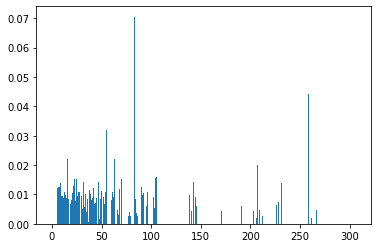

In [25]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier(
    objective= 'binary:logistic',
    nthread=-1,
    seed=42
)

# Grid of values to be tested
params = gridsearch.best_params_

xgboost.fit(X_train, Y_train)

importance = xgboost.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
imp_df = pd.DataFrame(importance, columns=['importance'])
imp_df.sort_values(by='importance', inplace=True, ascending=False)
imp_df

,importance
83,0.070494
259,0.044062
55,0.032095
16,0.022220
63,0.022188
...,...
160,0.000000
161,0.000000
162,0.000000
163,0.000000


XGBOOST Option 1

In [80]:
get_features_names(preprocessor)

NameError: name 'get_features_names' is not defined

In [ ]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6], # exactly the same role as in scikit-learn
    'min_child_weight': [1, 2, 3], # effect is more or less similar to min_samples_leaf and min_samples_split
    'n_estimators': [2, 4, 6, 8,] # exactly the same role as in scikit-learn
}
print(params)
gridsearch = GridSearchCV(xgboost, 
    param_grid = params, 
    cv = 3 # cv : the number of folds to be used for CV
    ) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print()
print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [2, 4, 6], 'min_child_weight': [1, 2, 3], 'n_estimators': [2, 4, 6, 8]}
...Done.
Best hyperparameters :  {'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 8}
Best validation accuracy :  0.5674113499220286

Accuracy on training set :  0.6838021338506305
Accuracy on test set :  0.6124031007751938


In [ ]:
xgboost = XGBClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6], # exactly the same role as in scikit-learn
    'min_child_weight': [1, 2, 3], # effect is more or less similar to min_samples_leaf and min_samples_split
    'n_estimators': [2, 4, 6, 8,] # exactly the same role as in scikit-learn
}